<a href="https://colab.research.google.com/github/reimanrey93/fastapi-challenge/blob/main/TP_IVCII_Reiman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta es la actividad para entregar las resoluciones a los trabajos de las guías. Aclarar los integrantes del grupo, entrega uno solo del grupo.

Deben adjuntar los archivos notebook, el link al colab o bien, un PDF describiendo la solución (paso a paso) a los siguientes problemas.
Recuerden incorporar las explicaciones que consideren pertinentes, fragmentos de códigos y las salidas respectivas junto a sus observaciones/conclusiones.

Guía Introducción - Ejercicio 3

Guía Operaciones puntuales - Ejercicio 4.2

Guía Operaciones puntuales - Ejercicio 4.3

Guía Histogramas - Ejercicio 1.2

Guía Filtrado Espacial - Ejercicio 4.2

Guía Color - Ejercicio 4 (opcional)

Guía Color - Ejercicio 5.2

Guía Introducción - Ejercicio 3

Ejercicio 3: Aplicaci´on
Utilice las herramientas aprendidas en esta unidad para implementar un sistema
que permita identificar una botella que no est´a correctamente llena. Las im´agenes
que se proporcionar´an son capturadas con una c´amara fija, en escala de grises y
directamente de la l´ınea de envasado. Para implementar el sistema deber´a bastarle
una imagen de ejemplo “botella.tif” (que encontrar´a en el repositorio). Adicional-
mente, se espera que el sistema pueda:
identificar una botella no-llena en cualquier posici´on de la imagen.
indicar la posici´on de la botella en la imagen (podr´ıa ser con un recuadro,
informando la posici´on relativa entre botellas, la posici´on absoluta en pixels,
etc).
informar el porcentaje de llenado de la botella no-llena.

Saving botellas.tif to botellas.tif


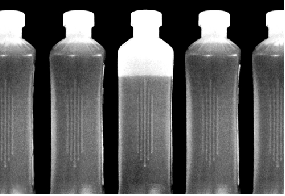

In [ ]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Cargar imágen
uploaded = files.upload()

# Extrear nomre de la imágen
file_name = list(uploaded.keys())[0]

# Cargar la imágen en OpenCV
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

cv2_imshow(image)


Saving botellas.tif to botellas (1).tif
Botella 1: 85.33% de altura correctamente llena
Botella 2: 86.00% de altura correctamente llena
Botella 3: 69.33% de altura (no correctamente llena)
Botella 4: 88.67% de altura correctamente llena
Botella 5: 86.67% de altura correctamente llena


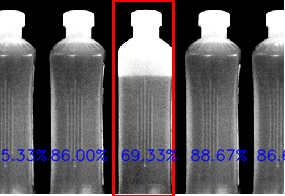

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Subir la imagen desde tu computadora
uploaded = files.upload()

# Extraer el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar la imagen en OpenCV
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

#Hacer copia de la imagen original para dibujar el cuadro y texto
image_with_rectangle = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# columnas de centro
columnas_analizar = [10, 70, 140, 210, 276]

# Umbral de llenado (85%)
umbral_llenado = 85

for idx, columna in enumerate(columnas_analizar):
    columna_pixels = image[:, columna]

    # Calcular el porcentaje de llenado
    altura_llena = np.sum(columna_pixels[:150] < 255)
    porcentaje_llenado = (altura_llena / 150) * 100

    if porcentaje_llenado < umbral_llenado:
        print(f"Botella {idx + 1}: {porcentaje_llenado:.2f}% de altura (no correctamente llena)")

        # Definir los límites del rectángulo
        left = max(columna - 27, 0)  # Centro de la botella (ancho de 55/2)
        right = min(left + 60, image.shape[1])  # Ancho total de 55 píxeles
        top = 0
        bottom = min(200, image.shape[0])  # Altura total de 185 píxeles

        # Dibujar cuadro
        cv2.rectangle(image_with_rectangle, (left, top), (right, bottom), (0, 0, 255), 2)

    else:
        print(f"Botella {idx + 1}: {porcentaje_llenado:.2f}% de altura correctamente llena")

    # Añadir texto con porcentajes a la imágen
    text_position = (columna - 20, 160)
    cv2.putText(image_with_rectangle, f"{porcentaje_llenado:.2f}%", text_position,
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

cv2_imshow(image_with_rectangle)


2. Al final del proceso de manufactura de placas madres, de marca ASUS modelo
A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE.
Implemente un algoritmo, que a partir de una imagen, determine que tipo de
placa es. Haga uso de las t´ecnicas de realce apendidas y utilice las im´agenes
a7v600-x.gif y a7v600-SE.gif. Adapte el m´etodo de forma que contemple el
reconocimiento de im´agenes que han sido afectadas por un ruido aleatorio
impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif )

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_reference_image_x():
    print("Carga la imagen de referencia para A7V600-X")
    uploaded = files.upload()
    for name in uploaded.keys():
        image_x = Image.open(name).convert('L')
        image_array_x = np.array(image_x)
    return image_array_x

def load_reference_image_se():
    print("Carga la imagen de referencia para A7V600-SE")
    uploaded = files.upload()
    for name in uploaded.keys():
        image_se = Image.open(name).convert('L')
        image_array_se = np.array(image_se)
    return image_array_se

# Paso 3: Cargar la imagen
def load_image_to_classify():
    print("Carga la imagen que deseas clasificar")
    uploaded = files.upload()
    for name in uploaded.keys():
        image = Image.open(name).convert('L')
        image_array = np.array(image)
    return image_array

# Paso 4: Extraer el área(fila 50 a 238, columnas 173 a 349)
def extract_area_of_interest(image):
    fila_inicial = 50
    fila_final = 238
    columna_inicial = 173
    columna_final = 349
    area_interes = image[fila_inicial:fila_final, columna_inicial:columna_final]
    return area_interes

# Paso 5: Calcular el media y la desviación estándar de la sección
def analyze_tonalidad(area_interes):
    mean_tonalidad = np.mean(area_interes)
    std_tonalidad = np.std(area_interes)
    return mean_tonalidad, std_tonalidad

ref_image_x = load_reference_image_x()
ref_image_se = load_reference_image_se()

area_interes_x = extract_area_of_interest(ref_image_x)
area_interes_se = extract_area_of_interest(ref_image_se)

image = load_image_to_classify()

area_interes = extract_area_of_interest(image)

mean_x, std_x = analyze_tonalidad(area_interes_x)
mean_se, std_se = analyze_tonalidad(area_interes_se)
mean_cargada, std_cargada = analyze_tonalidad(area_interes)

print(f"A7V600-X: Promedio = {mean_x:.2f}, Desviación estándar = {std_x:.2f}")
print(f"A7V600-SE: Promedio = {mean_se:.2f}, Desviación estándar = {std_se:.2f}")
print(f"Imagen cargada: Promedio = {mean_cargada:.2f}, Desviación estándar = {std_cargada:.2f}")

if abs(mean_cargada - mean_x) < abs(mean_cargada - mean_se):
    print("La placa es del modelo: A7V600-X")
else:
    print("La placa es del modelo: A7V600-SE")




Carga la imagen de referencia para A7V600-X


Saving a7v600-X.gif to a7v600-X (7).gif
Carga la imagen de referencia para A7V600-SE


Saving a7v600-SE.gif to a7v600-SE (8).gif
Carga la imagen que deseas clasificar


Saving a7v600-X.gif to a7v600-X (8).gif
A7V600-X: Promedio = 113.01, Desviación estándar = 69.38
A7V600-SE: Promedio = 119.07, Desviación estándar = 65.88
Imagen cargada: Promedio = 113.01, Desviación estándar = 69.38
La placa es del modelo: A7V600-X


Carga la imagen de blister a clasificar:


Saving blister_incompleto.jpg to blister_incompleto.jpg
Se encontraron píldoras faltantes en 1 posiciones.


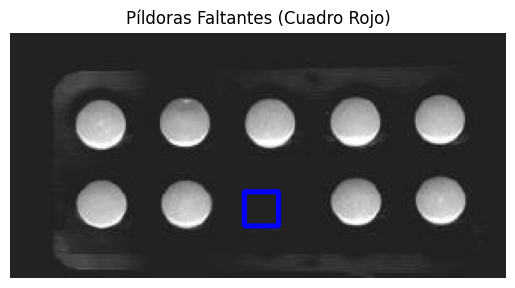

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def load_image():
    uploaded = files.upload()
    for name in uploaded.keys():
        image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
        return image, name

# Función para aplicar binarización
def threshold_image(image):
    # Aplicar binarización para destacar píldoras (zonas claras)
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
    return binary_image

#verificar si falta una píldora
def check_pill_presence(binary_image, row, col_start, col_end):
    # Extraer los píxeles de la columna en la fila dada
    column_pixels = binary_image[row, col_start:col_end]

    # Calcular la intensidad media de los píxeles binarizados
    mean_intensity = np.mean(column_pixels)

    # Si la intensidad media es alta (valor cercano a 255), falta la píldora
    if mean_intensity > 200:
        return False
    return True

# analizar el blister
def analyze_pill_positions(image):
    # Binarizar la imagen para separar píldoras (zonas claras) del fondo
    binary_image = threshold_image(image)

    # Coordenadas
    row_top = 56
    row_bottom = 103
    column_ranges = [(40, 56), (88, 117), (137, 179), (188, 218), (236, 267)]

    missing_pills = []

    # Verificar las filas superior e inferior
    for idx, (col_start, col_end) in enumerate(column_ranges):
        if not check_pill_presence(binary_image, row_top, col_start, col_end):
            missing_pills.append((col_start, row_top, col_end))

        if not check_pill_presence(binary_image, row_bottom, col_start, col_end):
            missing_pills.append((col_start, row_bottom, col_end))

    # Dibujar cuadros rojos
    image_with_rectangles = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for col_start, row, col_end in missing_pills:
        cv2.rectangle(image_with_rectangles, (col_start, row - 10), (col_start + 20, row + 10), (0, 0, 255), 2)

    if missing_pills:
        print(f"Se encontraron píldoras faltantes en {len(missing_pills)} posiciones.")
    else:
        print("El blister está completo.")

    plt.imshow(image_with_rectangles, cmap='gray')
    plt.title('Píldoras Faltantes (Cuadro Rojo)')
    plt.axis('off')
    plt.show()

print("Carga la imagen de blister a clasificar:")
blister_image, _ = load_image()

analyze_pill_positions(blister_image)



2. Los archivos histo1.tif, histo2.tif, histo3.tif, histo4.tif e histo5.tif
contienen histogramas de im´agenes con diferentes caracter´ısticas. Se pide:
1
Analizando solamente los archivos de histograma y realice una descrip-
ci´on de la imagen a la que corresponden (¿es clara u oscura?, ¿tiene buen
contraste?, ¿el histograma me explica algo respecto de la ubicaci´on de
los grises?, etc.).
Anote la correspondencia histograma-imagen con los archivos imagenA.tif
a imagenE.tif, bas´andose en su an´alisis previo.
Cargue las im´agenes originales y muestre los histogramas. Comparelos
con sus respuestas del punto anterior.
Obtenga y analice la utilidad de las siguientes propiedades estad´ısticas
de los histogramas: media, varianza, asimetr´ıa, energ´ıa y entrop´ıa.

Carga las imágenes (una por una) para analizar:


Saving imagenE.tif to imagenE.tif
Saving imagenD.tif to imagenD.tif
Saving imagenC.tif to imagenC.tif
Saving imagenA.tif to imagenA.tif
Saving imagenB.tif to imagenB.tif


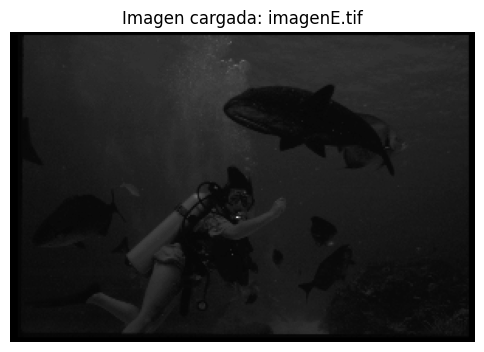

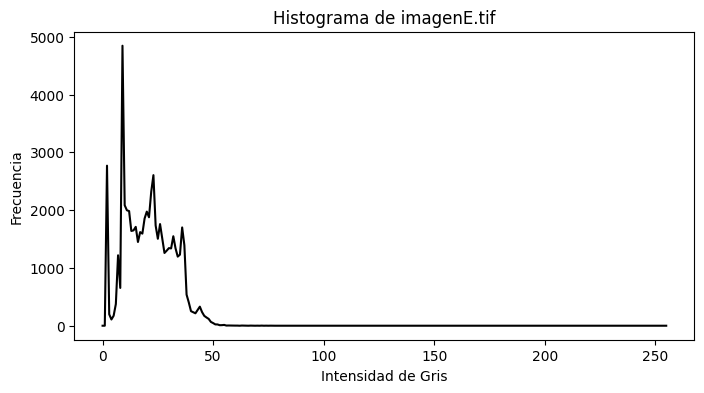

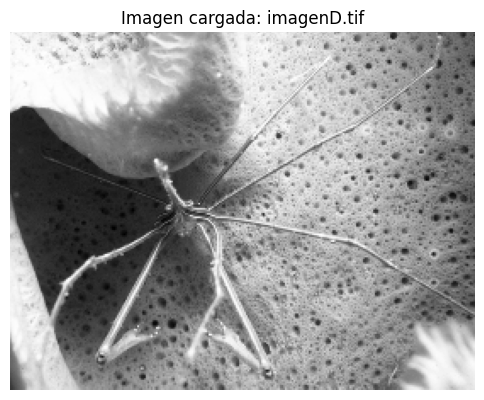

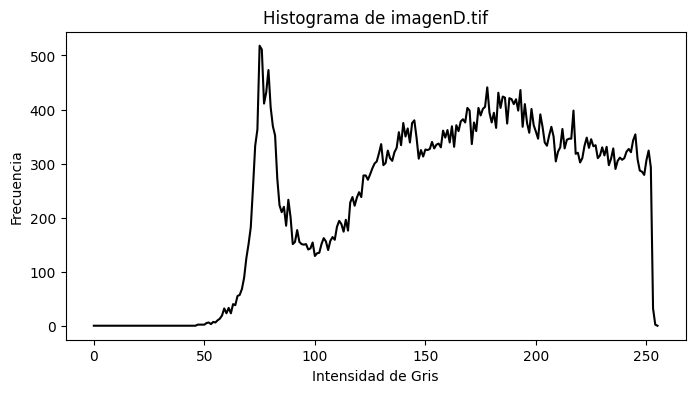

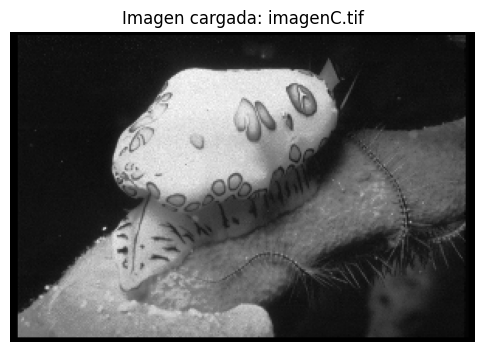

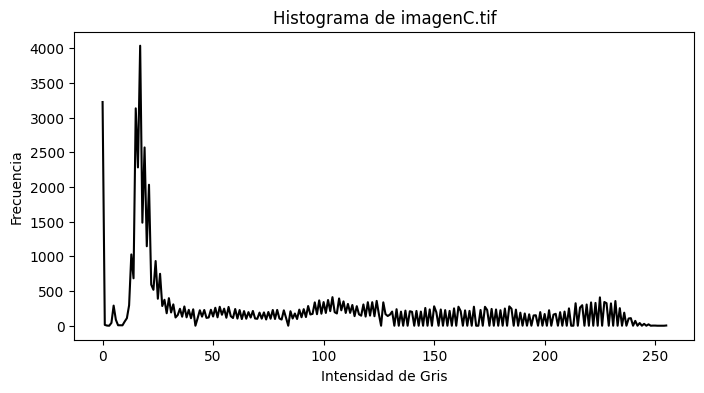

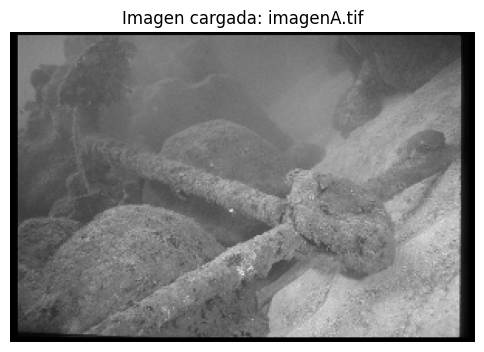

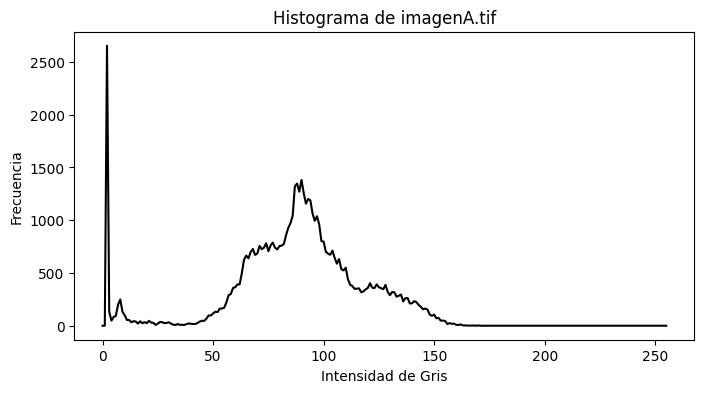

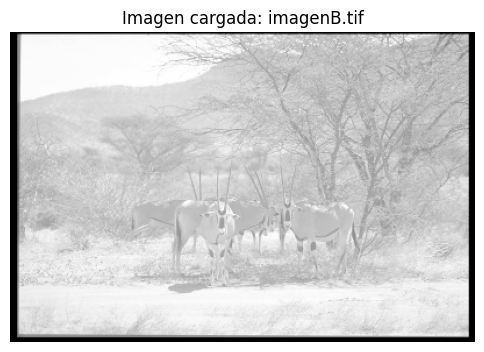

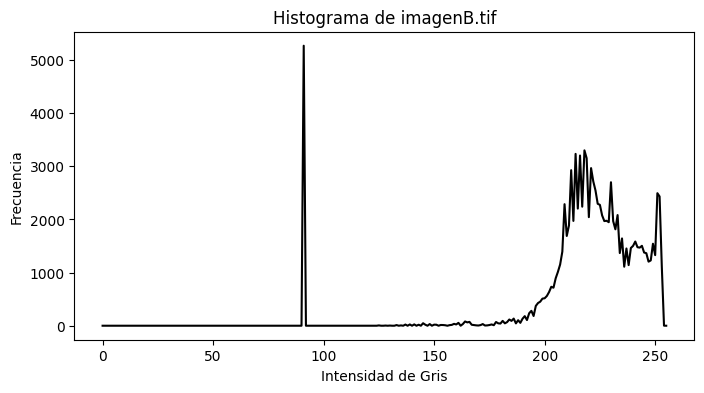

In [14]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def load_and_plot_multiple_histograms():
    uploaded = files.upload()

    for name in uploaded.keys():
        image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)

        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        # Mostrar la imagen
        plt.figure(figsize=(6, 6))
        plt.title(f"Imagen cargada: {name}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

        # Mostrar el histograma
        plt.figure(figsize=(8, 4))
        plt.title(f"Histograma de {name}")
        plt.xlabel("Intensidad de Gris")
        plt.ylabel("Frecuencia")
        plt.plot(hist, color='black')
        plt.show()

# Cargar y visualizar los histogramas de las imágenes
print("Carga las imágenes (una por una) para analizar:")
load_and_plot_multiple_histograms()



Carga las imágenes (una por una) para analizar:


Saving imagenE.tif to imagenE (2).tif
Saving imagenD.tif to imagenD (2).tif
Saving imagenC.tif to imagenC (2).tif
Saving imagenB.tif to imagenB (2).tif
Saving imagenA.tif to imagenA (2).tif


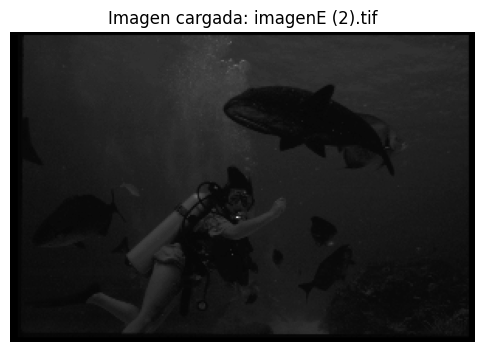

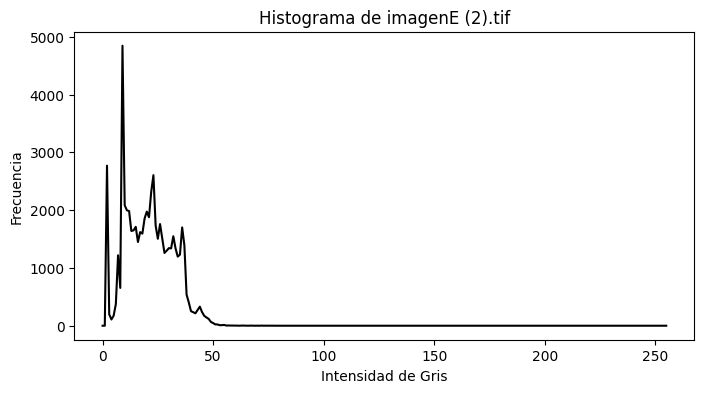

Número total de píxeles: 60000.0
Propiedades estadísticas de imagenE (2).tif:
 - Media: 20.88
 - Varianza: 114.58
 - Asimetría: 0.34
 - Energía: 0.0318
 - Entropía: 5.2031




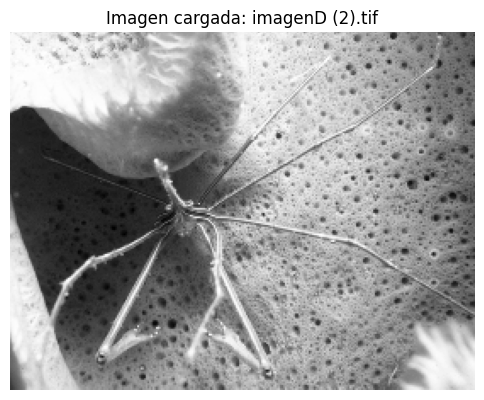

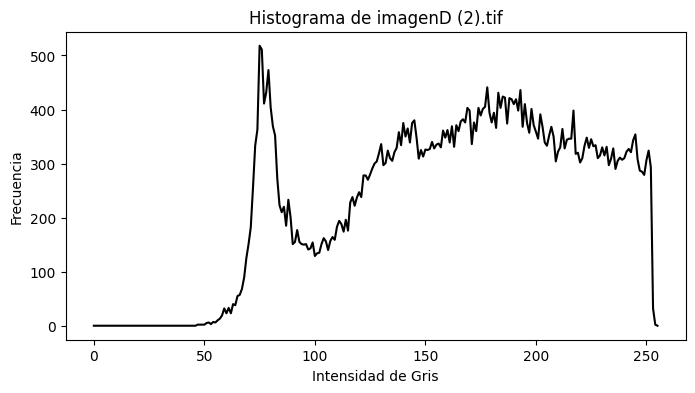

Número total de píxeles: 57814.0
Propiedades estadísticas de imagenD (2).tif:
 - Media: 165.94
 - Varianza: 2663.74
 - Asimetría: -0.24
 - Energía: 0.0057
 - Entropía: 7.5108




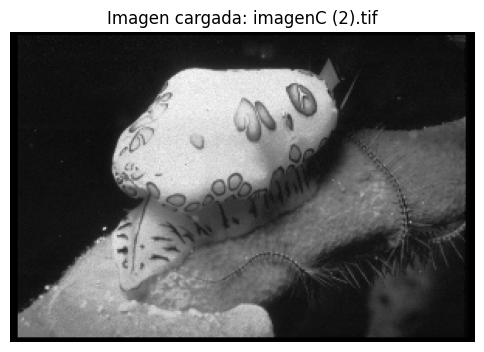

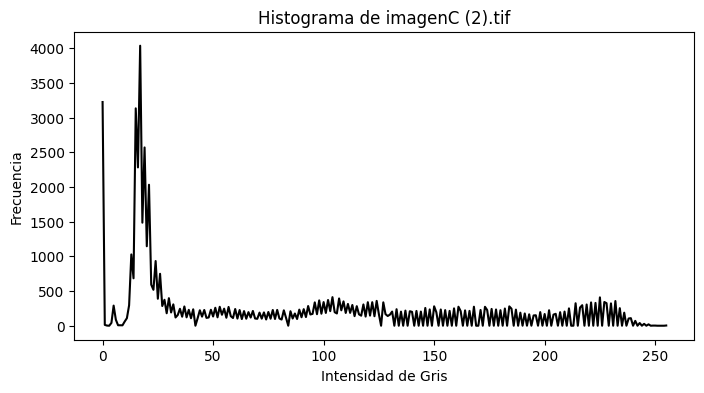

Número total de píxeles: 60000.0
Propiedades estadísticas de imagenC (2).tif:
 - Media: 77.66
 - Varianza: 5079.12
 - Asimetría: 0.79
 - Energía: 0.0189
 - Entropía: 6.7393




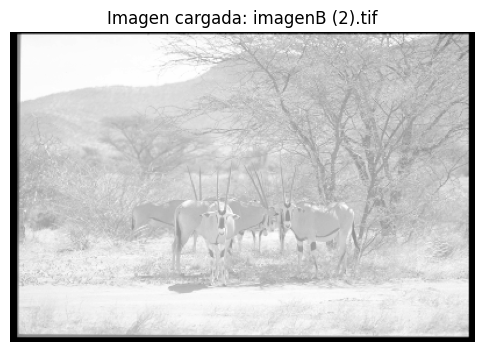

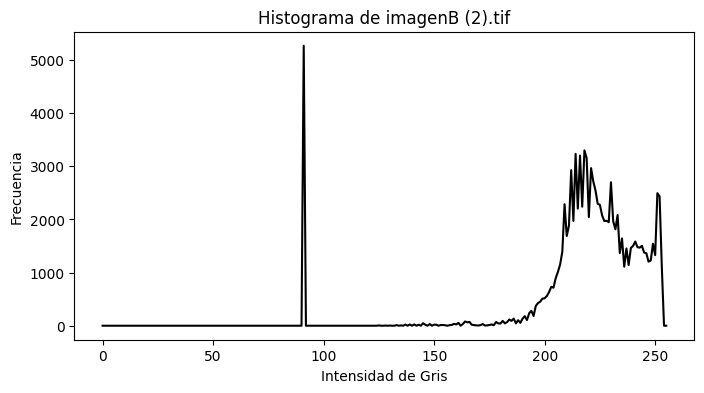

Número total de píxeles: 106800.0
Propiedades estadísticas de imagenB (2).tif:
 - Media: 218.15
 - Varianza: 1089.35
 - Asimetría: -2.74
 - Energía: 0.0202
 - Entropía: 5.8616




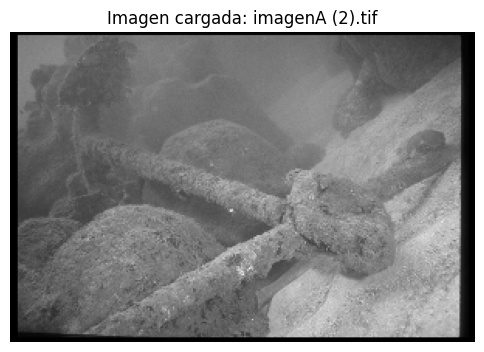

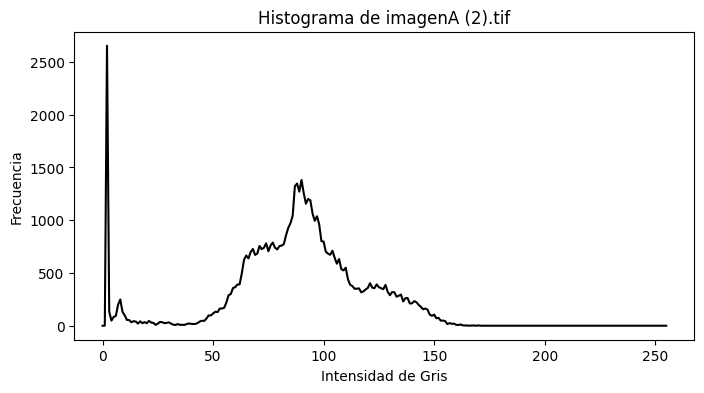

Número total de píxeles: 60000.0
Propiedades estadísticas de imagenA (2).tif:
 - Media: 87.23
 - Varianza: 1010.37
 - Asimetría: -0.79
 - Energía: 0.0133
 - Entropía: 6.5922




In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from google.colab import files

def calculate_entropy(hist):
    hist_normalized = hist / hist.sum()
    hist_normalized = hist_normalized[hist_normalized > 0]
    return -np.sum(hist_normalized * np.log2(hist_normalized))

def calculate_statistics(hist, image):
    total_pixels = hist.sum()
    hist_normalized = hist / total_pixels

    pixel_values = np.arange(256)
    mean = np.sum(hist_normalized.flatten() * pixel_values)

    variance = np.sum(hist_normalized.flatten() * (pixel_values - mean) ** 2)

    skewness = skew(image.flatten())
    energy = np.sum(hist_normalized ** 2)
    entropy = calculate_entropy(hist)

    print(f"Número total de píxeles: {total_pixels}")

    return mean, variance, skewness, energy, entropy

def load_plot_histogram_and_calculate_stats():
    uploaded = files.upload()

    for name in uploaded.keys():
        image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)

        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        plt.figure(figsize=(6, 6))
        plt.title(f"Imagen cargada: {name}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(8, 4))
        plt.title(f"Histograma de {name}")
        plt.xlabel("Intensidad de Gris")
        plt.ylabel("Frecuencia")
        plt.plot(hist, color='black')
        plt.show()

        mean, variance, skewness, energy, entropy = calculate_statistics(hist, image)

        print(f"Propiedades estadísticas de {name}:")
        print(f" - Media: {mean:.2f}")
        print(f" - Varianza: {variance:.2f}")
        print(f" - Asimetría: {skewness:.2f}")
        print(f" - Energía: {energy:.4f}")
        print(f" - Entropía: {entropy:.4f}")
        print("\n")

print("Carga las imágenes (una por una) para analizar:")
load_plot_histogram_and_calculate_stats()



4.2

Carga las imágenes para analizar:


Saving flores02.jpg to flores02 (1).jpg
Saving mariposa02.png to mariposa02.png
Saving lapices02.jpg to lapices02.jpg


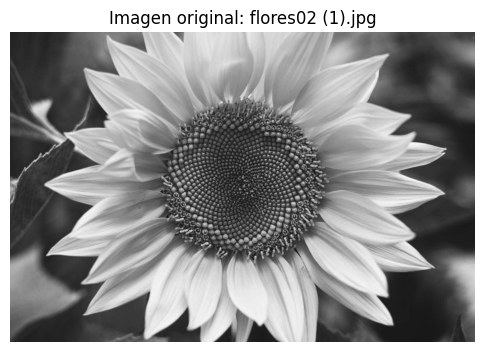

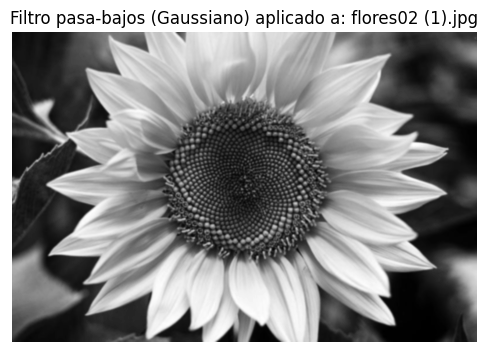

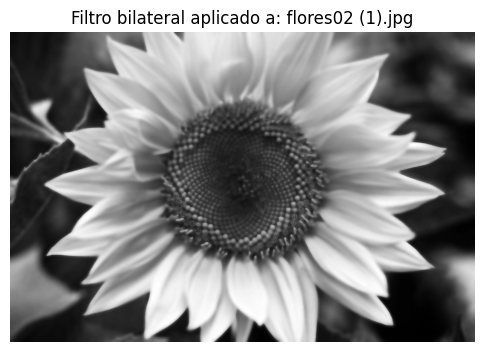

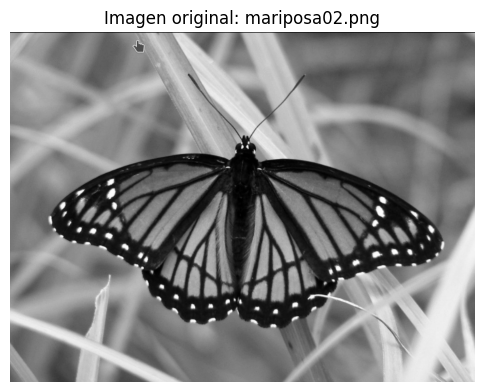

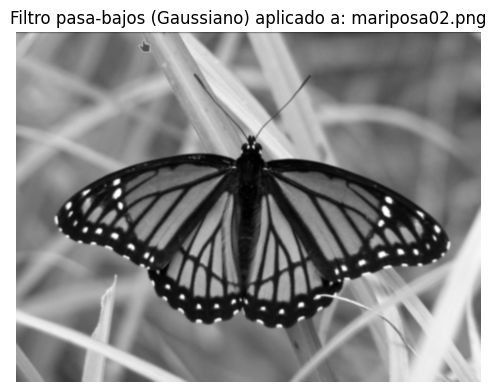

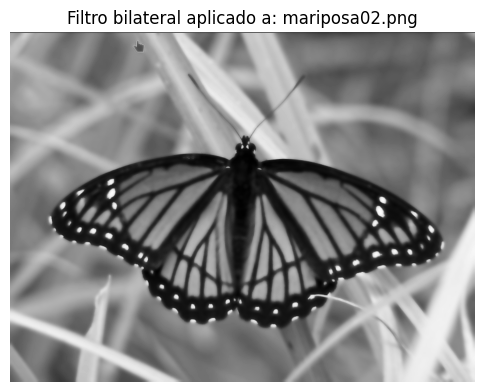

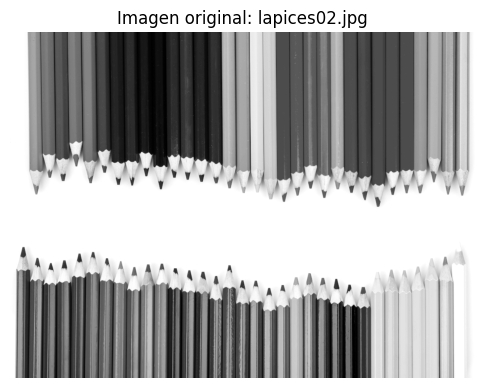

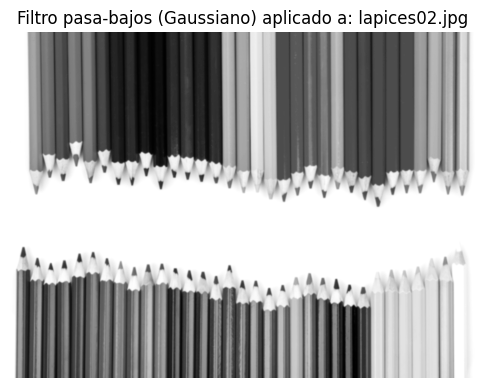

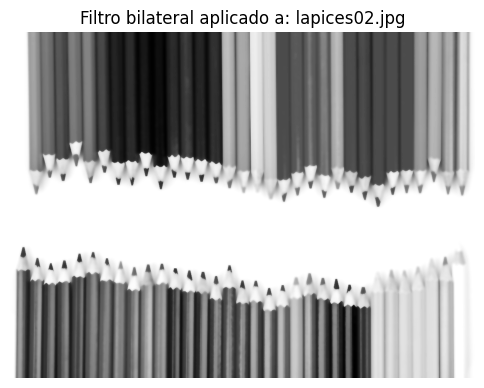

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def load_and_process_images():
    uploaded = files.upload()

    images = {}
    for name in uploaded.keys():
        image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
        images[name] = image

        plt.figure(figsize=(6, 6))
        plt.title(f"Imagen original: {name}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

        low_pass = cv2.GaussianBlur(image, (5, 5), 0)

        # Aplicar filtro bilateral
        bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

        plt.figure(figsize=(6, 6))
        plt.title(f"Filtro pasa-bajos (Gaussiano) aplicado a: {name}")
        plt.imshow(low_pass, cmap='gray')
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(6, 6))
        plt.title(f"Filtro bilateral aplicado a: {name}")
        plt.imshow(bilateral, cmap='gray')
        plt.axis('off')
        plt.show()

    return images

print("Carga las imágenes para analizar:")
processed_images = load_and_process_images()


Visualizando perfiles de grises para la fila 100 (puedes cambiar el valor de 'row'):


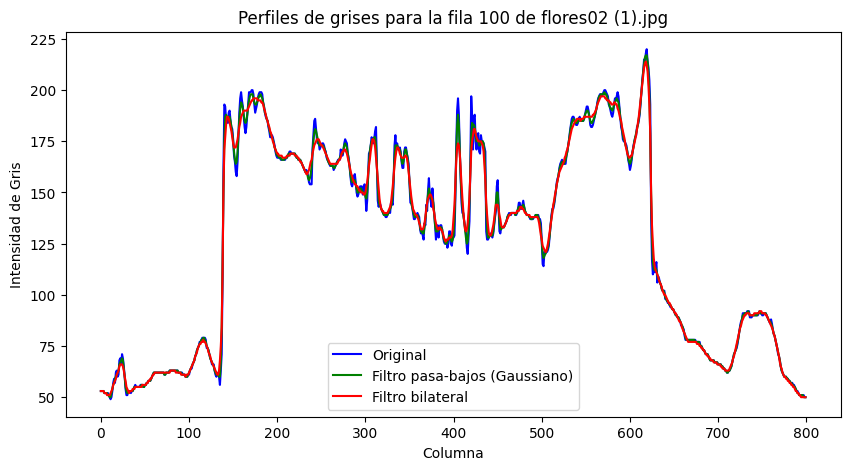

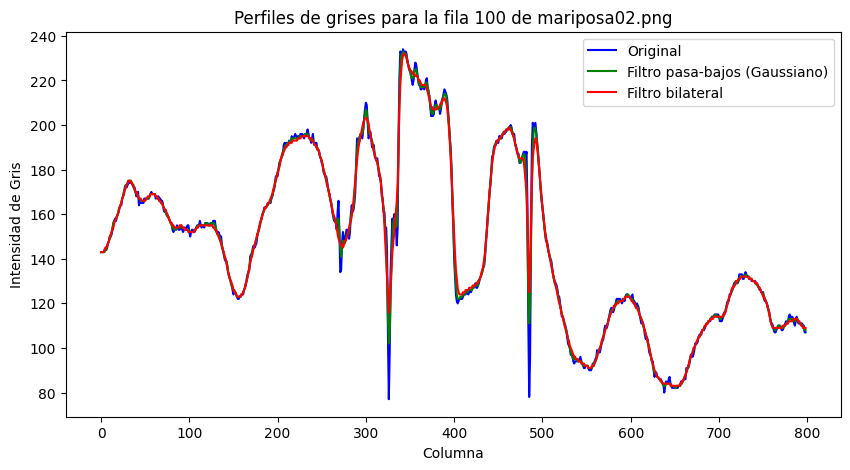

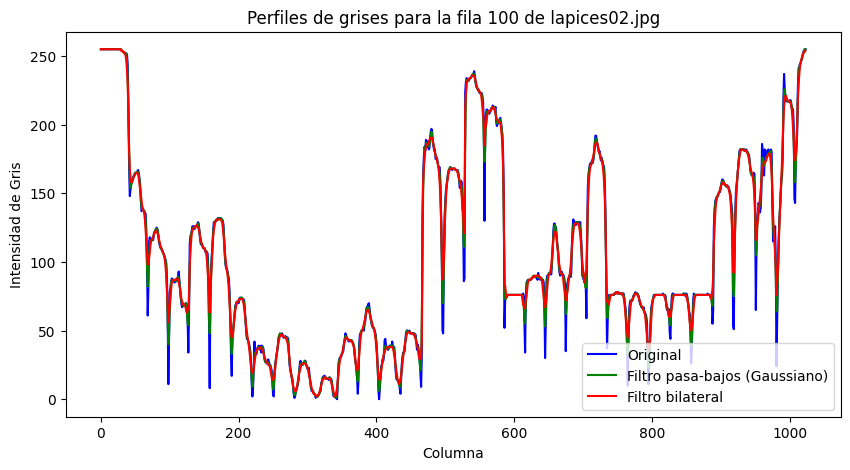

In [ ]:
import matplotlib.pyplot as plt

# Función para visualizar perfiles de grises de una fila específica
def plot_gray_profiles(images, row=100):
    for name, image in images.items():
        low_pass = cv2.GaussianBlur(image, (5, 5), 0)

        bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

        original_profile = image[row, :]
        low_pass_profile = low_pass[row, :]
        bilateral_profile = bilateral[row, :]

        # Visualizar los perfiles de gris
        plt.figure(figsize=(10, 5))
        plt.title(f"Perfiles de grises para la fila {row} de {name}")
        plt.plot(original_profile, label='Original', color='blue')
        plt.plot(low_pass_profile, label='Filtro pasa-bajos (Gaussiano)', color='green')
        plt.plot(bilateral_profile, label='Filtro bilateral', color='red')
        plt.xlabel("Columna")
        plt.ylabel("Intensidad de Gris")
        plt.legend()
        plt.show()

print("Visualizando perfiles de grises para la fila 100 (puedes cambiar el valor de 'row'):")
plot_gray_profiles(processed_images, row=100)


Guía Color - Ejercicio **5.2**
-Análisis HSV para bsucar la combinación de valores para la máscara.
-Aplicación de máscaras y obtención de la desoforestación.

Carga la imagen mediante un upload:


Saving Deforestacion.png to Deforestacion (9).png


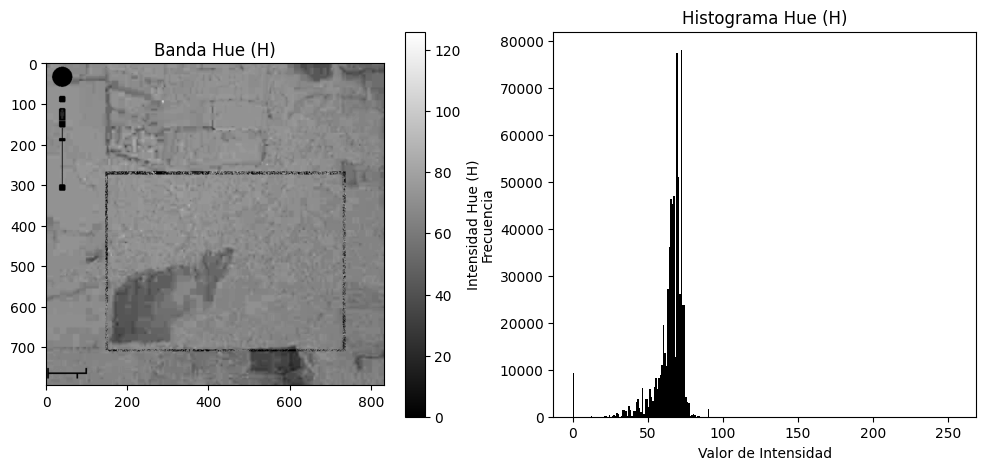

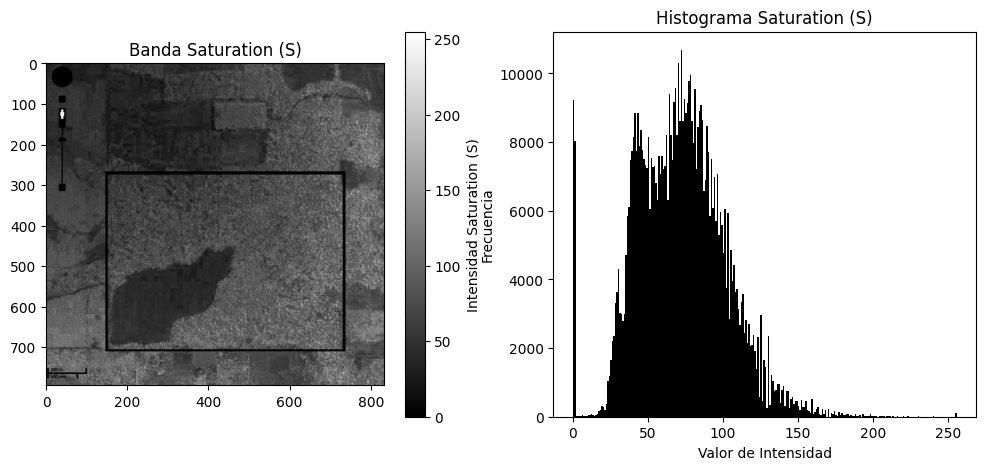

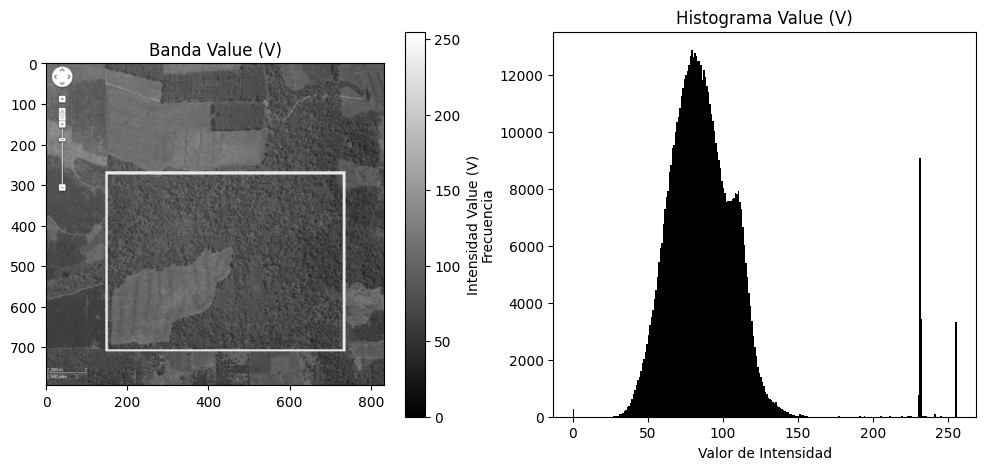

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Función para cargar la imagen mediante upload
def load_image():
    uploaded = files.upload()
    for name in uploaded.keys():
        image = cv2.imread(name)
        return image

# Función para mostrar la imagen de una banda y su histograma
def show_band_and_histogram(band, band_name):
    plt.figure(figsize=(12, 5))

    # Mostrar la imagen de la banda
    plt.subplot(1, 2, 1)
    plt.title(f'Banda {band_name}')
    plt.imshow(band, cmap='gray')
    plt.colorbar(label=f'Intensidad {band_name}')

    # Mostrar el histograma de la banda
    plt.subplot(1, 2, 2)
    plt.title(f'Histograma {band_name}')
    plt.hist(band.ravel(), bins=256, range=(0, 256), color='black')
    plt.xlabel('Valor de Intensidad')
    plt.ylabel('Frecuencia')

    plt.show()

print("Carga la imagen mediante un upload:")
image = load_image()

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Separar las bandas H, S, V
h, s, v = cv2.split(hsv_image)

# Mostrar la banda H (Hue) y su histograma
show_band_and_histogram(h, 'Hue (H)')

# Mostrar la banda S (Saturation) y su histograma
show_band_and_histogram(s, 'Saturation (S)')

# Mostrar la banda V (Value) y su histograma
show_band_and_histogram(v, 'Value (V)')



Carga la imagen satelital Deforestacion.png:


Saving Deforestacion.png to Deforestacion (19).png


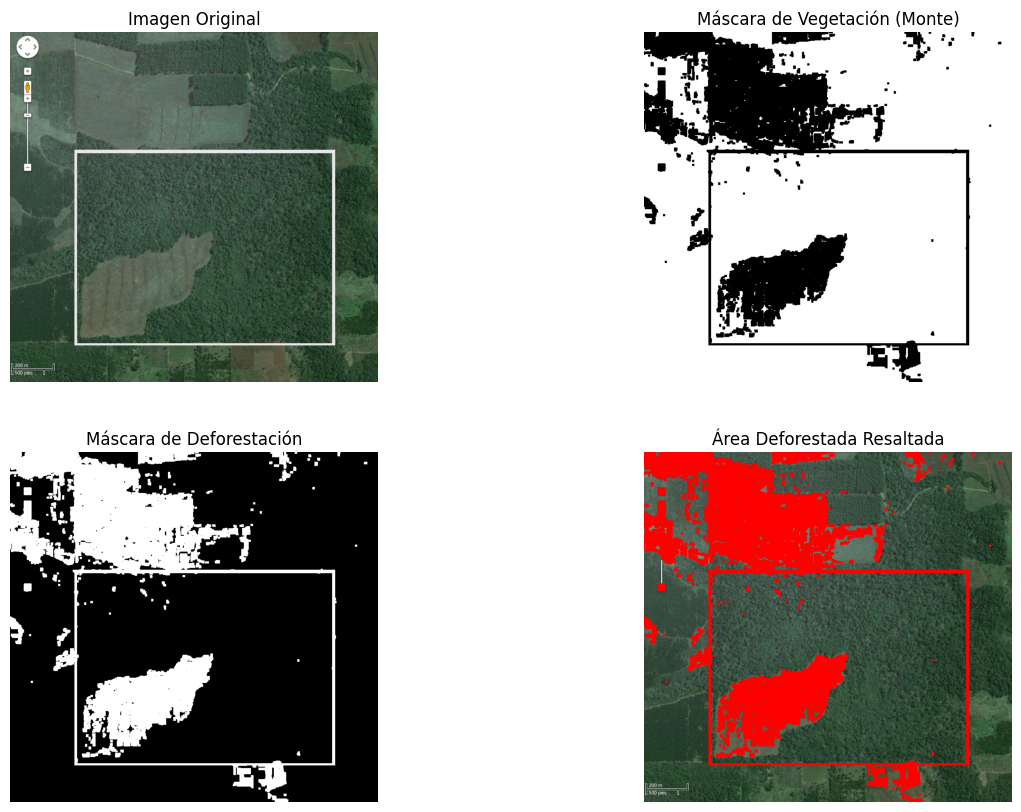

Área total: 66219.60 hectáreas
Área con monte: 52107.50 hectáreas
Área deforestada: 14112.10 hectáreas


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def load_image():
    uploaded = files.upload()
    for name in uploaded.keys():
        image = cv2.imread(name)
        return image

def segment_deforestation(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_bound = np.array([35, 50, 50])
    upper_bound = np.array([85, 255, 255])

    vegetation_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    kernel = np.ones((5, 5), np.uint8)
    vegetation_mask = cv2.morphologyEx(vegetation_mask, cv2.MORPH_CLOSE, kernel)

    deforestation_mask = cv2.bitwise_not(vegetation_mask)

    deforestation_mask = cv2.morphologyEx(deforestation_mask, cv2.MORPH_OPEN, kernel)

    highlighted_image = image.copy()
    highlighted_image[deforestation_mask > 0] = [0, 0, 255]
    return vegetation_mask, deforestation_mask, highlighted_image

def calculate_areas(vegetation_mask, deforestation_mask, pixel_area_hectares=0.1):
    total_pixels = vegetation_mask.shape[0] * vegetation_mask.shape[1]
    vegetation_area_pixels = np.sum(vegetation_mask > 0)
    deforestation_area_pixels = np.sum(deforestation_mask > 0)

    total_area = total_pixels * pixel_area_hectares
    vegetation_area = vegetation_area_pixels * pixel_area_hectares
    deforestation_area = deforestation_area_pixels * pixel_area_hectares

    return total_area, vegetation_area, deforestation_area

def display_results(image, highlighted_image, vegetation_mask, deforestation_mask):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Máscara de Vegetación (Monte)')
    plt.imshow(vegetation_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Máscara de Deforestación')
    plt.imshow(deforestation_mask, cmap='gray')
    plt.axis('off')

    # Imagen resaltada
    plt.subplot(2, 2, 4)
    plt.title('Área Deforestada Resaltada')
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

print("Carga la imagen satelital Deforestacion.png:")
image = load_image()

vegetation_mask, deforestation_mask, highlighted_image = segment_deforestation(image)

total_area, vegetation_area, deforestation_area = calculate_areas(vegetation_mask, deforestation_mask)

display_results(image, highlighted_image, vegetation_mask, deforestation_mask)

print(f"Área total: {total_area:.2f} hectáreas")
print(f"Área con monte: {vegetation_area:.2f} hectáreas")
print(f"Área deforestada: {deforestation_area:.2f} hectáreas")

